In [1]:
import numpy as np
from zipfile import ZipFile
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

stopwords_set = stopwords.words("English")


In [2]:
corpus = []
with ZipFile("../src/data/judgements.zip") as zipfile:
    for filename in zipfile.namelist():
        with open("../src/data/" + filename, errors="replace") as f:
            corpus.append(f.read())
len(corpus)

400

In [3]:
bccourt_words = [word.lower() for text in corpus for word in word_tokenize(text) if word.isalpha()]
len(bccourt_words)

622868

In [4]:
types = set(bccourt_words)
len(types)

16178

In [5]:
counts = Counter(bccourt_words)
counts.most_common(25)

[('the', 59149),
 ('of', 26198),
 ('to', 19835),
 ('in', 15304),
 ('and', 14577),
 ('that', 13772),
 ('a', 11889),
 ('for', 7924),
 ('was', 7776),
 ('is', 7472),
 ('on', 6030),
 ('not', 5338),
 ('as', 4789),
 ('be', 4779),
 ('by', 4778),
 ('he', 4714),
 ('i', 4704),
 ('it', 4362),
 ('this', 4121),
 ('with', 3580),
 ('at', 3466),
 ('an', 3388),
 ('his', 3379),
 ('plaintiff', 3124),
 ('or', 3118)]

In [6]:
counts = Counter([word for word in bccourt_words if word not in stopwords_set])
counts.most_common(25)

[('plaintiff', 3124),
 ('court', 2502),
 ('would', 2142),
 ('appeal', 1891),
 ('evidence', 1689),
 ('defendant', 1674),
 ('judge', 1661),
 ('trial', 1660),
 ('justice', 1658),
 ('appellant', 1619),
 ('order', 1604),
 ('counsel', 1575),
 ('time', 1499),
 ('case', 1350),
 ('made', 1212),
 ('respondent', 1159),
 ('honourable', 1144),
 ('one', 1117),
 ('judgment', 1103),
 ('act', 1020),
 ('british', 1013),
 ('columbia', 1012),
 ('may', 1010),
 ('reasons', 999),
 ('application', 993)]

In [7]:
"""
Code borrowed from lecture 4 of COLX 521
"""

corpora = ["treebank", "gutenberg", "reuters", "switchboard","webtext", "movie_reviews"]
exec("from nltk.corpus import " + ", ".join(corpora))

def ordered_bar_from_dict(py_dict, title):
    '''create a bar chart from values in py_dict, ordered from smallest to largest and labeled with keys'''
    labels = sorted(py_dict.keys(),key=lambda x: py_dict[x])
    y_pos = np.arange(len(labels))
    values = sorted(py_dict.values())

    plt.bar(y_pos, values, align='center', alpha=0.5,color=list('rgbkym'))
    plt.xticks(y_pos, labels,rotation=45)
    plt.title(title)
    plt.show()

def type_token_ratio(words, num_words):
    '''calculate type-token ratio from the corpus of word tokens (list of strings) using the first
    num_words tokens'''
    type_set = set(word.lower() for word in words[:num_words])
    return len(type_set) / num_words    

def average_word_length(words):
    '''calculate the average length of the provided words'''
    total_words = 0
    total_chars = 0
    for word in words:
        total_words += 1
        total_chars += len(word)
    return total_chars/total_words

def get_unigram_probs(words):
    '''get unigram probabilities for the words in a corpus'''
    counts = Counter(word.lower() for word in words)
    total = sum(counts.values())
    return {word:count/total for word,count in counts.items()}
    
def divide_probs(prob1, prob2):
    '''given two probability dictionaries, create a dictionary has the ratios of probabilities (prob1/prob2)
    for each word included in both'''
    all_words = set(prob1.keys()).intersection(prob2.keys())
    return {word:prob1.get(word,0)/prob2.get(word,0) for word in all_words}

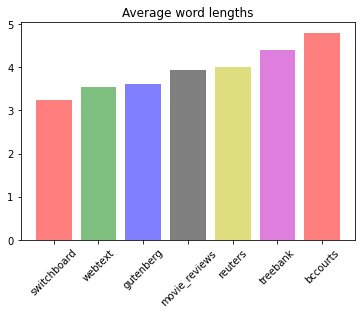

In [8]:
avg_word_lengths = {}
avg_word_lengths["bccourts"] = average_word_length(bccourt_words)
for corpus in corpora:
    exec("words = " +corpus + ".words()")
    avg_word_lengths[corpus] = average_word_length(words)
ordered_bar_from_dict(avg_word_lengths,"Average word lengths")

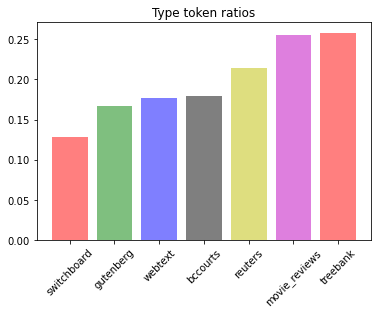

In [9]:
ttrs = {}
ttrs["bccourts"] = type_token_ratio(bccourt_words, 10000)
for corpus in corpora:
    exec("words = " +corpus + ".words()")
    ttrs[corpus] = type_token_ratio(words,10000)
ordered_bar_from_dict(ttrs,"Type token ratios")

In [10]:
switchboard_probs = get_unigram_probs(switchboard.words())
bccourt_probs = get_unigram_probs(bccourt_words)

div_dict = divide_probs(switchboard_probs, bccourt_probs)
div_sorted_words = sorted(div_dict.keys(), key=lambda x: div_dict[x])

print(div_sorted_words[:50])

['act', 'columbia', 'court', 'justice', 'upon', 'evidence', 'claim', 'however', 'loss', 'reasonable', 'appeal', 'canada', 'following', 'party', 'shall', 'british', 'october', 'order', 'accident', 'therefore', 'facts', 'required', 'present', 'agreed', 'respect', 'june', 'sale', 'limited', 'received', 'sum', 'reasons', 'further', 'july', 'satisfied', 'material', 'granted', 'motor', 'supreme', 'entered', 'interest', 'action', 'apply', 'august', 'consideration', 'judge', 'trial', 'issue', 'suffered', 'clearly', 'duty']


In [11]:
treebank_probs = get_unigram_probs(treebank.words())
bccourt_probs = get_unigram_probs(bccourt_words)

div_dict = divide_probs(treebank_probs, bccourt_probs)
div_sorted_words = sorted(div_dict.keys(), key=lambda x: div_dict[x])

print(div_sorted_words[:50])

['judgment', 'defendant', 'sentence', 'entitled', 'notice', 'appearing', 'accident', 'therefore', 'appropriate', 'trial', 'am', 'crown', 'sum', 'appeal', 'jurisdiction', 'circumstances', 'granted', 'pain', 'driver', 'injury', 'application', 'agree', 'respect', 'dismiss', 'wife', 'premises', 'sentencing', 'count', 'reasons', 'b', 'date', 'facts', 'insured', 'defendants', 'properly', 'maintenance', 'failure', 'present', 'proper', 'purposes', 'parties', 'argument', 'sufficient', 'property', 'residence', 'stated', 'error', 'conviction', 'vehicle', 'evidence']
